# Interpolacja Dla zagadnienia Lagrange'a

## Generowanie wielomianów interpolacyjch oraz węzłów

### Metoda Hermite'a

In [11]:
function CreateInterpolationHermitePolynominal(X, Y)
    n = sum((x)->length(x), Y)
    differenceQuotients = zeros(n, n)

    j = 1
    for i in 1:length(X)
        for _ in Y[i]
            differenceQuotients[1,j] = Y[i][1]
            j+=1
        end
    end
    for i in 2:n
        for j in i:n
            differenceQuotients[i, j] = (differenceQuotients[i-1,j] - differenceQuotients[i-1,j-1]) / (X[j] - X[j-i+1])
        end
    end
    # return (x) -> 
    # begin
    #     res = differenceQuotients[1,1]
    #     product = (x - X[1])
    #     for i in 2:n
    #         res += product*differenceQuotients[i,i]
    #         product *= (x - X[i])
    #     end
    #     return res
    # end
end

f1 = CreateInterpolationHermitePolynominal([1,2], [[1, 2],[4, 4]])
println("f1(1)=$(f1(1)), f1(1.5)=$(f1(1.5)), f1(2)=$(f1(2))")

2
2


MethodError: MethodError: objects of type Nothing are not callable

### Meoda Newtona

In [91]:

function CreateInterpolationNewtonPolynominal(X, Y)
    n = length(X)
    differenceQuotients = zeros(n, n)
    for i in 1:n
        differenceQuotients[1,i] = Y[i]
    end
    for i in 2:n
        for j in i:n
            differenceQuotients[i, j] = (differenceQuotients[i-1,j] - differenceQuotients[i-1,j-1]) / (X[j] - X[j-i+1])
        end
    end
    return (x) -> 
    begin
        res = differenceQuotients[1,1]
        product = (x - X[1])
        for i in 2:n
            res += product*differenceQuotients[i,i]
            product *= (x - X[i])
        end
        return res
    end
end

f2 = CreateInterpolationNewtonPolynominal([1,2,3], [1, 4, 9])
println("f2(1)=$(f2(1)), f2(1.5)=$(f2(1.5)), f2(2)=$(f2(2))")

f2(1)=1.0, f2(1.5)=2.25, f2(2)=4.0


### Generacja węzłów oraz wielomianu interpolacji

In [92]:
function getEvenSpacesAndInterpolationPolynominal(A, B, func, n, createFunc=CreateInterpolationLagrangePolynominal)
    X = range(A, stop=B, length=n)
    return X, createFunc(X, map(func, X))
end

function getCzebyszewZerosAndInterpolationPolynominal(A, B, func, n, createFunc=CreateInterpolationLagrangePolynominal)
    X = map((k)-> (B-A)/2*cos(((2*k-1)/2n*pi)) + (A + B)/2, 1:n)
    return X, createFunc(X, map(func, X))
end

getCzebyszewZerosAndInterpolationPolynominal (generic function with 2 methods)

## Rysowanie wykresów

In [93]:
using Plots
using PrettyTables

function drawInterpolation(X, func, interpolationFunc, title="" , accuracy=10e-4)
    minVal, maxVal = extrema(X)
    len = maxVal - minVal
    x = minVal:(len)*accuracy:maxVal
    plot(x, func, label="f(x)", width=1.5)
    plot!(x, interpolationFunc, label="interpolacja")
    plot!(X, map(func, X), seriestype=:scatter, label="węzły")
    title!(title)
end

function drawInterpolationN(func, nodesNumers, A, B; getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal,
     creationFunc = CreateInterpolationLagrangePolynominal,title="" , accuracy=10e-4)
    len =  B - A
    x = A:(len)*accuracy:B
    plot(x, func, label="f(x)", width=1.5)
    for n in nodesNumers
        X, interpolationFunc = getNodesFunc(A, B, func, n, creationFunc)
        plot!(x, interpolationFunc, label="interpolacja n=$n")
        plot!(X, map(func, X), seriestype=:scatter, label="węzły  n=$n")
    end
    title!(title)
end

function addInterpolationToPlot(func, n, A, B, labelInterpolation="interpolacja n=$n",labelNodes="węzły n=$n", getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal, creationFunc = CreateInterpolationLagrangePolynominal)
    X, interpolationFunc = getNodesFunc(A, B, func, n, creationFunc)
    plot!(x, interpolationFunc, label=labelInterpolation)
    plot!(X, map(func, X), seriestype=:scatter, label=labelNodes)
end

addInterpolationToPlot (generic function with 5 methods)

### Przykłady wywołania

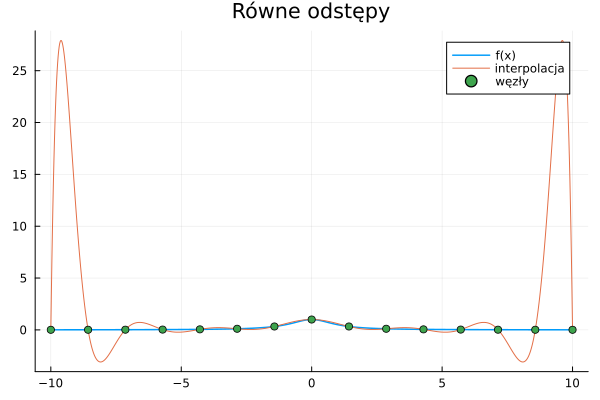

In [94]:
f = (x) -> 1/(x^2 + 1)
X, intF = getEvenSpacesAndInterpolationPolynominal(-10,10, f, 15) 
drawInterpolation(X, f, intF, "Równe odstępy")

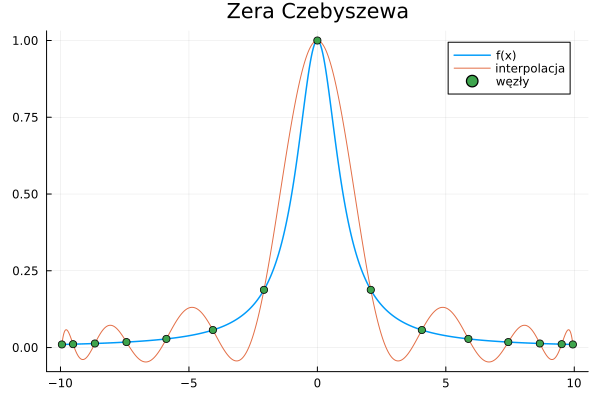

In [95]:
f = (x) -> 1/(x^2 + 1)
X, intF = getCzebyszewZerosAndInterpolationPolynominal(-10,10, f, 15) 

drawInterpolation(X, f, intF, "Zera Czebyszewa")

## Funkcja przyzielona na zajciach

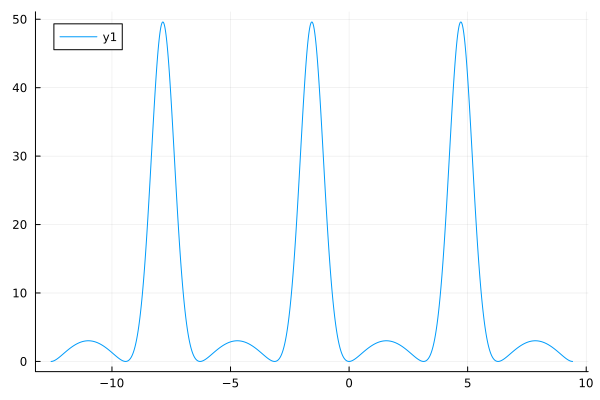

In [97]:
k = 4
m = 1
A = -4*pi
B = 3*pi
my_func = (x) -> exp(-k*sin(m*x)) + k*sin(m*x) - 1
xs = -4*pi:0.01:3*pi

plot(xs, my_func)

### Wykresy

#### Równe Odstępy

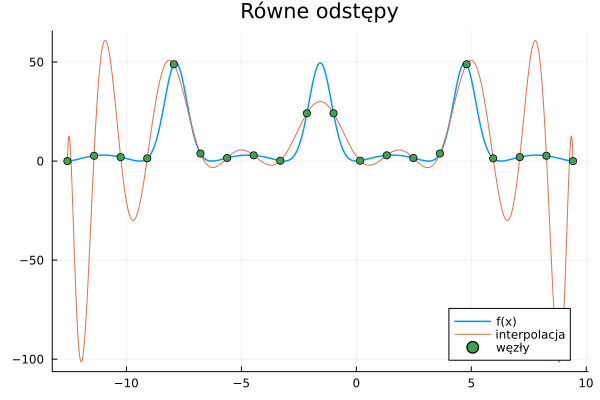

In [143]:
f = my_func
n = 20
X, intF = getEvenSpacesAndInterpolationPolynominal(A, B, f, n) 
drawInterpolation(X, f, intF, "Równe odstępy")
# savefig("plots/ROn$n")

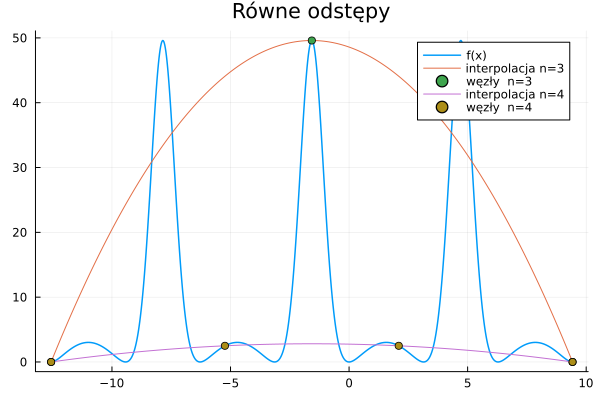

In [99]:
drawInterpolationN(my_func, [3, 4], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

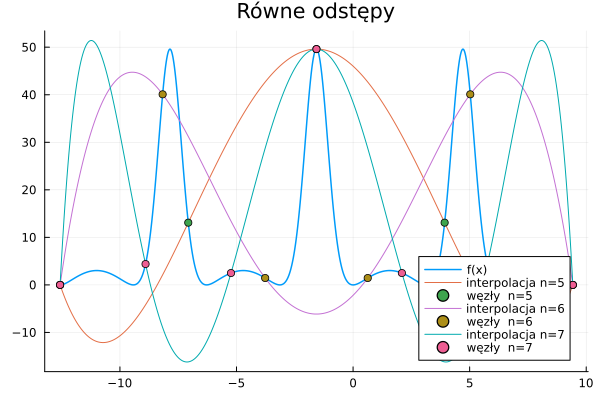

In [100]:
drawInterpolationN(my_func, [5, 6, 7], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

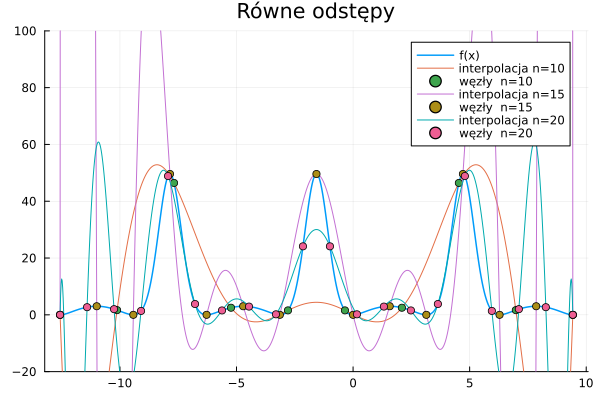

In [27]:
drawInterpolationN(my_func, [10, 15, 20], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")
ylims!((-20, 100))

#### Zera Czebyszewa

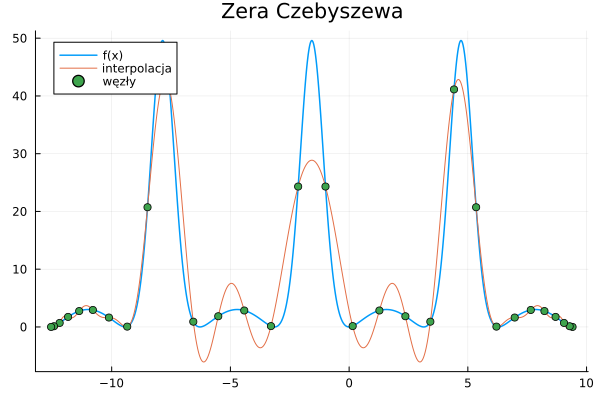

In [104]:
f = my_func
n = 30
X, intF = getCzebyszewZerosAndInterpolationPolynominal(A, B, f, n) 
drawInterpolation(X, f, intF, "Zera Czebyszewa")
# savefig("plots/ZCn$n")

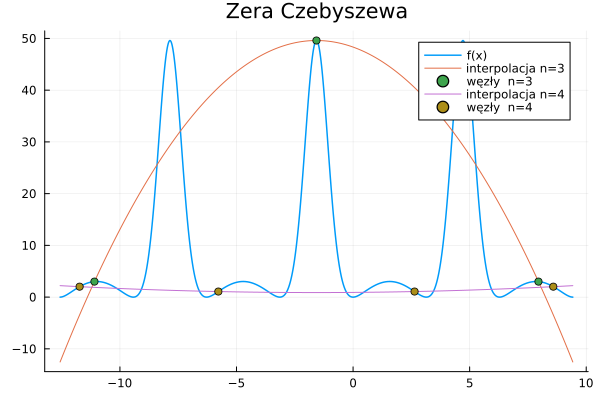

In [22]:
drawInterpolationN(my_func, [3, 4], A, B; title="Zera Czebyszewa")

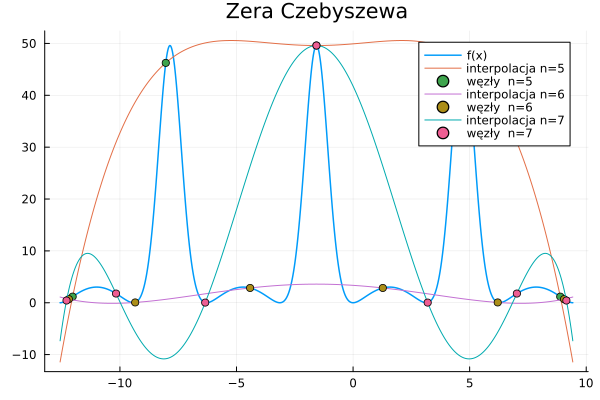

In [24]:
drawInterpolationN(my_func, [5, 6, 7], A, B; title="Zera Czebyszewa")

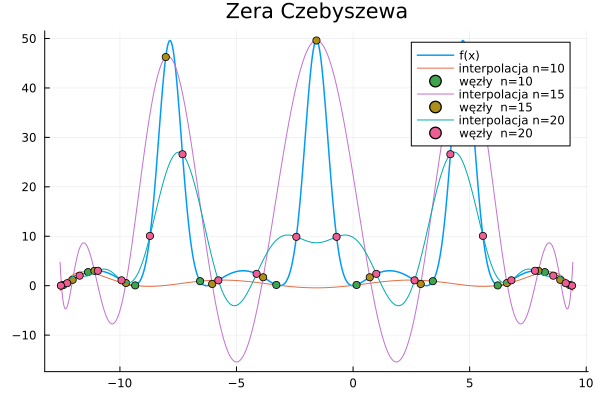

In [26]:
drawInterpolationN(my_func, [10, 15, 20], A, B, title=:"Zera Czebyszewa")

### Obliczanie dokładności

In [152]:
function maximalAmplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return maximum(map((x)->abs(f1(x) - f2(x)), X))
end

function RMSamplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return sqrt(sum((x)->(f1(x)- f2(x))^2,X) / length(X))
end

n = [3,4,5,6,7,8,9,10,11,12,15,20,30,40,45,50]

16-element Vector{Int64}:
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 15
 20
 30
 40
 45
 50

#### Równe odstępy

In [153]:
interpolationsEvenSpaces = [getEvenSpacesAndInterpolationPolynominal(A, B, my_func, i)[2] for i in n]
maxAes = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAes = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAes; digits=4))
println("max:", round.(rmsAes; digits=4))


n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 45, 50]
max:[48.6312, 47.7077, 46.4503, 55.7325, 62.4959, 49.5982, 139.6336, 84.2854, 147.5433, 43.9603, 3738.1012, 102.8283, 876354.1343, 2.26340209792e8, 2.6931696658071e10, 3.99530626371575e10]
max:[30.2718, 15.9354, 26.4835, 25.3136, 31.3631, 16.9837, 50.2781, 33.1336, 44.6118, 19.8007, 925.8126, 26.8507, 141508.8363, 3.07323644665e7, 3.3969411004856e9, 4.750808259346e9]


#### Zera Czebyszewa

In [154]:
interpolationsEvenSpaces = [getCzebyszewZerosAndInterpolationPolynominal(A, B, my_func, i)[2] for i in n]
maxAcz = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAcz = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAcz; digits=4))
println("max:", round.(rmsAcz; digits=4))

n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 45, 50]
max:[48.399, 48.7152, 50.1747, 48.8368, 60.1715, 64.8936, 45.5705, 50.036, 35.6949, 42.4471, 31.9965, 40.9175, 20.7262, 13.0606, 3872.4638, 213744.7402]
max:[28.9259, 16.3867, 35.8093, 16.1956, 25.0503, 23.7788, 20.3405, 16.9386, 16.2864, 12.9576, 14.3898, 10.9254, 5.2376, 2.2993, 201.4691, 12853.8942]


### Porównanie

In [163]:
# println("max amplitude")
pretty_table([n maxAcz maxAes]; backend = Val(:html), header=["n", "zera Czebyszewa", "Równe odstępy"], formatters = ft_printf("%10.2f", [2,3]))

n,zera Czebyszewa,Równe odstępy
3.0,48.40,48.63
4.0,48.72,47.71
5.0,50.17,46.45
6.0,48.84,55.73
7.0,60.17,62.50
8.0,64.89,49.60
9.0,45.57,139.63
10.0,50.04,84.29
11.0,35.69,147.54
12.0,42.45,43.96


In [164]:
# println("max amplitude")
pretty_table([n rmsAcz rmsAes]; backend = Val(:html), header=["n", "zera Czebyszewa", "Równe odstępy"], formatters = ft_printf("%10.2f", [2,3]))

n,zera Czebyszewa,Równe odstępy
3.0,28.93,30.27
4.0,16.39,15.94
5.0,35.81,26.48
6.0,16.20,25.31
7.0,25.05,31.36
8.0,23.78,16.98
9.0,20.34,50.28
10.0,16.94,33.13
11.0,16.29,44.61
12.0,12.96,19.80


## Badanie funkcji kreujących

In [12]:
function creationFunctionMaksymalN(func, creationFunc, nodesFunc)
    n = 3
    flag=true
    while flag
        n += 1
        X, interpolationFunction = nodesFunc(A, B, func, n, creationFunc)
        for x in X
            if !(func(x) ≈ interpolationFunction(x))
                println("f(x)=$(func(x)), w(x)=$(interpolationFunction(x))")
                flag = false
                break
            end
        end
        if n == 1000
            println("more than 1000")
            return nothing
        end
    end
    println("found problem at n=$n")
    return n-1
end

function creationFunctionMaksymalNwithAtol(func, creationFunc, nodesFunc, atol)
    n = 3
    flag=true
    while flag
        n += 1
        X, interpolationFunction = nodesFunc(A, B, func, n, creationFunc)
        for x in X
            if !(isapprox(func(x), interpolationFunction(x); atol=atol))
                println("f(x)=$(func(x)), w(x)=$(interpolationFunction(x))")
                flag = false
                break
            end
        end
        if n == 1000
            println("more than 1000")
            return nothing
        end
    end
    println("found problem at n=$n")
    return n-1
end

creationFunctionMaksymalNwithAtol (generic function with 1 method)

#### metoda Lagrange'a

In [258]:

println("Even Spaces:")
n1 = creationFunctionMaksymalN(my_func, CreateInterpolationLagrangePolynominal, getEvenSpacesAndInterpolationPolynominal)
println("Czebyszew Zeros:")
n2 = creationFunctionMaksymalN(my_func, CreateInterpolationLagrangePolynominal, getCzebyszewZerosAndInterpolationPolynominal)
# n = 359 countd after 6m 12s, czebyszew zeros
# n = 332 counted after 4m 25s, even spaces

Even Spaces:


f(x)=0.0, w(x)=NaN
found problem at n=333
Czebyszew Zeros


f(x)=0.007025386058036931, w(x)=NaN
found problem at n=360


359

#### metoda Newtona

In [14]:
println("Even Spaces:")
n1 = creationFunctionMaksymalN(my_func, CreateInterpolationNewtonPolynominal, getEvenSpacesAndInterpolationPolynominal)
println("Czebyszew Zeros")
n2 = creationFunctionMaksymalN(my_func, CreateInterpolationNewtonPolynominal, getCzebyszewZerosAndInterpolationPolynominal)

Even Spaces:
f(x)=0.0, w(x)=-1.6338945869939143e-15
found problem at n=4
Czebyszew Zeros


f(x)=0.02090510417985203, w(x)=0.020905102474697734
found problem at n=16


15

In [38]:
println("Even Spaces, lesser accurancy:")
atol=5e-7
n1 = creationFunctionMaksymalNwithAtol(my_func, CreateInterpolationNewtonPolynominal, getEvenSpacesAndInterpolationPolynominal, atol)
println("Czebyszew Zeros, lesser accurancy:")
n2 = creationFunctionMaksymalNwithAtol(my_func, CreateInterpolationNewtonPolynominal, getCzebyszewZerosAndInterpolationPolynominal, atol)

Even Spaces, lesser accurancy:
f(x)=2.399575659039108, w(x)=2.3995747081935406
found problem at n=23
Czebyszew Zeros, lesser accurancy:
f(x)=2.918728558894886, w(x)=2.9187277549062856
found problem at n=22


21